# Unit 5 - Financial Planning

In [43]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import datetime
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/richardrosenthal/ws/Module_5_Challenge/env copy.txt")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [4]:
bitcoin = requests.get(btc_url) 
bitcoin = bitcoin.content
bitcoin = bitcoin.decode("utf-8")
bitcoin = json.loads(bitcoin)


In [5]:
bitcoin

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19624850,
   'total_supply': 19624850,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 48143.0,
     'volume_24h': 20274384603,
     'market_cap': 944900875173,
     'percentage_change_1h': -0.457402431843284,
     'percentage_change_24h': 1.67435979084451,
     'percentage_change_7d': 11.9947026530001,
     'percent_change_1h': -0.457402431843284,
     'percent_change_24h': 1.67435979084451,
     'percent_change_7d': 11.9947026530001}},
   'last_updated': 1707659564}},
 'metadata': {'timestamp': 1707659564,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
ethereum = requests.get(eth_url) 
ethereum = ethereum.content
ethereum = ethereum.decode("utf-8")
ethereum = json.loads(ethereum)

In [7]:
ethereum

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120170577,
   'total_supply': 120170577,
   'max_supply': 120170577,
   'quotes': {'USD': {'price': 2517.32,
     'volume_24h': 7595006228,
     'market_cap': 302608178458,
     'percentage_change_1h': -0.389350438099397,
     'percentage_change_24h': 1.00512680432121,
     'percentage_change_7d': 9.32487837387723,
     'percent_change_1h': -0.389350438099397,
     'percent_change_24h': 1.00512680432121,
     'percent_change_7d': 9.32487837387723}},
   'last_updated': 1707659566}},
 'metadata': {'timestamp': 1707659566,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [8]:
# Fetch current BTC price
# YOUR CODE HERE!
my_btc = bitcoin["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = bitcoin["data"]["1"]["quotes"]["USD"]["volume_24h"]/ my_btc
# Fetch current ETH price
# YOUR CODE HERE!
my_eth = ethereum["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = ethereum["data"]["1027"]["quotes"]["USD"]["volume_24h"]/ my_eth

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 48143.0 BTC is $421128.40
The current value of your 2517.32 ETH is $3017100.02


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-10-23", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = df_portfolio[df_portfolio['symbol']=='SPY'] #.drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'] #.drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                             \
                           close  high      low trade_count  open    volume   
timestamp                                                                     
2023-10-23 04:00:00+00:00  92.36  92.5  91.5819       35730  91.7  12886000   

                                                SPY                 \
                                vwap symbol   close    high    low   
timestamp                                                            
2023-10-23 04:00:00+00:00  92.292074    AGG  420.46  424.45  417.8   

                                                                            
                          trade_count    open    volume        vwap symbol  
timestamp                                                                   
2023-10-23 04:00:00+00:00      668638  419.61  92035097  421.414928    SPY

In [22]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.36
Current SPY closing price: $420.46


/var/folders/ws/rsylrm612111y18gk8xqr86w0000gn/T/ipykernel_27256/1766491632.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])
/var/folders/ws/rsylrm612111y18gk8xqr86w0000gn/T/ipykernel_27256/1766491632.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])


In [23]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21023.00
The current value of your 200 AGG shares is $18472.00


### Savings Health Analysis

In [29]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings_data = pd.DataFrame({
    "amount": [total_crypto,total_shares]}, index = ["Crypto", "Shares"])
# Display savings DataFrame
df_savings_data

,amount
Crypto,3438228.42
Shares,39495.00


<Axes: title={'center': 'Assets Savings'}, ylabel='amount'>

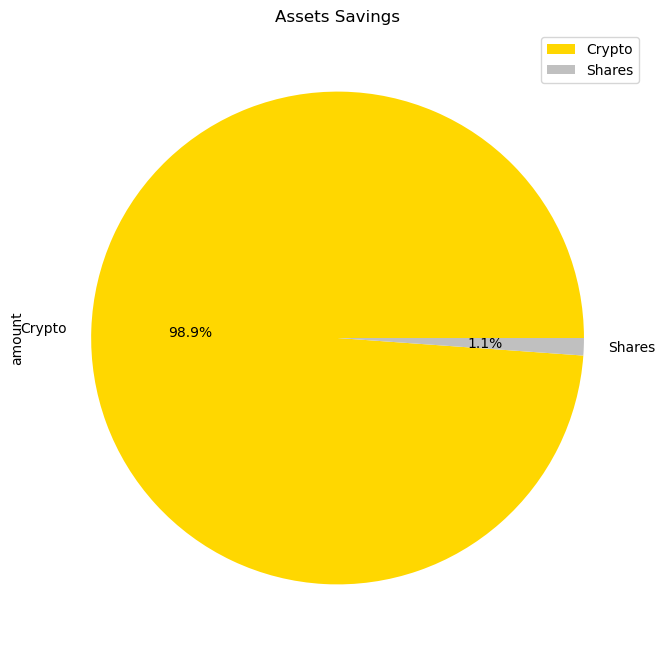

In [31]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings_data.plot.pie(y = "amount", title= "Assets Savings", colors = ('gold','silver'), figsize = (15,8), autopct='%1.1f%%')


In [33]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings_amount = df_savings_data['amount'].sum()
# Validate saving health
# YOUR CODE HERE!
if total_savings_amount > emergency_fund:
    print("Congratulations, you have enough money")
elif total_savings_amount == emergency_fund:
    print("Congratulations, you have an adequte emergency fund!")
else:
    print("You need to save more, you have an inadequte emergency fund")

Congratulations, you have enough money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [35]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = "1Day"
tickers = ["SPY","AGG"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
spy_data = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)
agg_data = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([agg_data, spy_data],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                            \
                           close   high    low trade_count   open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00 110.61 110.74 110.52       15122 110.74  3608552   
2016-05-03 04:00:00+00:00 110.81 110.94 110.75       15663 110.89  3128774   
2016-05-04 04:00:00+00:00 110.86 110.93 110.76       13984 110.91  3096337   
2016-05-05 04:00:00+00:00 111.14 111.16 110.80       15708 110.92  3052967   
2016-05-06 04:00:00+00:00 110.97 111.12 110.97       12697 111.12  2922700   

                                    SPY                                   \
                            vwap  close   high    low trade_count   open   
timestamp                                                                  
2016-05-02 04:00:00+00:00 110.63 207.97 208.18 206.41      263586 206.92   
2016-05-03 04:00:00+00:00 110.86 206.16 206.80 205.28      377523 206.52   
2016-05-04 04:00:00+00:00 110.88 205.01 205.85 204.42      345266 204.99   
2016-05-05 04:00:00+00:00 111.03 204.97 205.98 204.47      280626 205.56   
2016-05-06 04:00:00+00:00 111.03 205.72 205.77 203.88      340162 204.06   

                                             
                              volume   vwap  
timestamp                                    
2016-05-02 04:00:00+00:00   64747229 207.31  
2016-05-03 04:00:00+00:00  108050343 206.31  
2016-05-04 04:00:00+00:00   94995641 205.09  
2016-05-05 04:00:00+00:00   68425268 205.14  
2016-05-06 04:00:00+00:00   90999800 204.94

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [37]:
# Printing the simulation input data
# YOUR CODE HERE!
mc.portfolio_data.head()

AGG                                            \
                           close   high    low trade_count   open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00 110.61 110.74 110.52       15122 110.74  3608552   
2016-05-03 04:00:00+00:00 110.81 110.94 110.75       15663 110.89  3128774   
2016-05-04 04:00:00+00:00 110.86 110.93 110.76       13984 110.91  3096337   
2016-05-05 04:00:00+00:00 111.14 111.16 110.80       15708 110.92  3052967   
2016-05-06 04:00:00+00:00 110.97 111.12 110.97       12697 111.12  2922700   

                                                 SPY                \
                            vwap daily_return  close   high    low   
timestamp                                                            
2016-05-02 04:00:00+00:00 110.63          NaN 207.97 208.18 206.41   
2016-05-03 04:00:00+00:00 110.86         0.00 206.16 206.80 205.28   
2016-05-04 04:00:00+00:00 110.88         0.00 205.01 205.85 204.42   
2016-05-05 04:00:00+00:00 111.03         0.00 204.97 205.98 204.47   
2016-05-06 04:00:00+00:00 111.03        -0.00 205.72 205.77 203.88   

                                                                             
                          trade_count   open     volume   vwap daily_return  
timestamp                                                                    
2016-05-02 04:00:00+00:00      263586 206.92   64747229 207.31          NaN  
2016-05-03 04:00:00+00:00      377523 206.52  108050343 206.31        -0.01  
2016-05-04 04:00:00+00:00      345266 204.99   94995641 205.09        -0.01  
2016-05-05 04:00:00+00:00      280626 205.56   68425268 205.14        -0.00  
2016-05-06 04:00:00+00:00      340162 204.06   90999800 204.94         0.00

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 110.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 120.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 130.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 140.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 150.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 160.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 170.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 180.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 190.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 200.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 210.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 220.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 230.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 240.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 250.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 260.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 270.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 280.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 290.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 300.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 310.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 320.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 330.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 340.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 350.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 360.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 370.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 380.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 390.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 400.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 410.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 420.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 430.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 440.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 450.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 460.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 470.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 480.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

Running Monte Carlo simulation number 490.


/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/richardrosenthal/ws/CU-VIRT-FIN-PT-09-2023-U-LOLC/Hom

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.00,0.99,0.99,0.99,1.00,1.00,1.00,0.99,...,1.00,1.00,1.00,1.00,1.00,1.02,1.00,1.01,0.99,1.01
2,1.01,1.00,1.00,0.99,0.99,0.99,1.00,1.01,0.99,1.00,...,1.01,1.01,1.02,1.00,0.99,1.01,1.00,1.02,1.00,1.01
3,1.03,1.00,1.00,1.01,1.00,0.98,1.01,1.00,0.99,0.99,...,1.02,1.00,1.03,1.00,1.00,1.01,1.01,1.02,1.00,1.02
4,1.04,1.00,1.01,1.00,1.01,0.98,1.01,1.01,0.99,1.00,...,1.03,0.98,1.02,0.99,0.97,1.01,1.01,1.03,1.00,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.58,9.70,6.85,9.64,8.43,20.50,18.81,11.77,17.96,26.65,...,14.13,10.79,85.52,10.53,6.52,15.82,34.31,10.71,10.93,7.47
7557,12.45,9.73,6.85,9.64,8.46,20.88,18.92,11.73,18.04,26.43,...,14.07,10.82,84.87,10.50,6.52,15.92,34.58,10.70,10.87,7.47
7558,12.32,9.70,6.86,9.70,8.61,20.96,19.00,11.63,18.04,26.66,...,14.09,10.80,84.30,10.64,6.55,15.86,34.58,10.76,10.88,7.36
7559,12.37,9.66,6.89,9.83,8.53,21.05,19.00,11.56,17.94,26.72,...,14.06,10.81,84.55,10.68,6.60,15.75,34.54,10.75,10.92,7.27


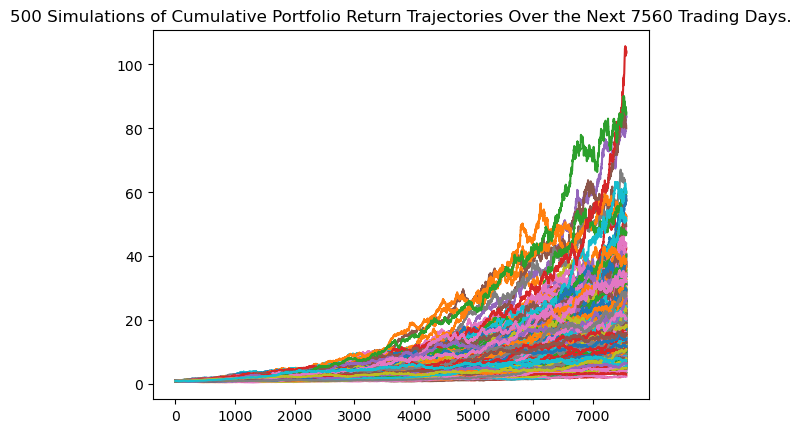

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_plot = mc.plot_simulation()

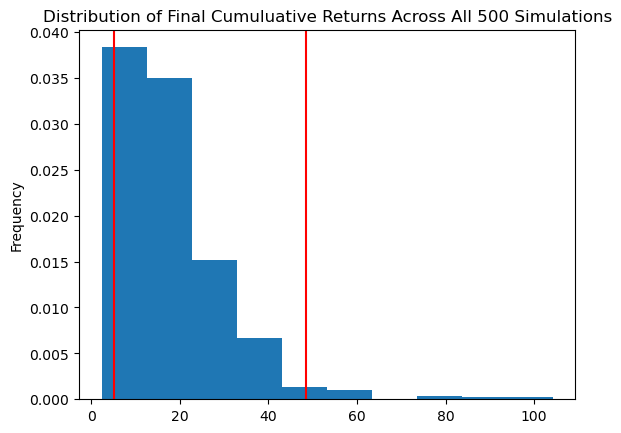

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_plot = mc.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_stats = mc.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
mc_stats

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(mc_stats[8]*initial_investment,2)
ci_upper = round(mc_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'mc_stats' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(mc_stats[8]*initial_investment,2)
ci_upper = round(mc_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")